In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

In [79]:
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

In [80]:
import warnings
warnings.filterwarnings("ignore")


In [81]:
data=pd.read_csv("Smart watch prices.csv")


In [82]:
print("number of rows:",data.shape[0])
print("number of rows:",data.shape[1])


number of rows: 379
number of rows: 13


In [83]:
data.columns


Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size (inches)', 'Resolution', 'Water Resistance (meters)',
       'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC',
       'Price (USD)'],
      dtype='object')

In [84]:
data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [85]:
duplicate_cols=data.columns.duplicated()

duplicate_cols


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [86]:
#drop duplicate columns
data = data.loc[:, ~duplicate_cols]


In [87]:
data

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159


In [88]:
data.shape

(379, 13)

In [89]:
data.describe()

,Display Size (inches)
count,376.000000
mean,1.363165
std,0.218986
min,0.900000
25%,1.200000
50%,1.390000
75%,1.400000
max,4.010000


"""Count: This represents the number of data points in the dataset. In this case, there are 376 data points related to display sizes.\n

**Mean**: The mean, or average, is a measure of central tendency. 1.363165 inches. This suggests that, on average, the display sizes are around 1.36 inches.\n

**Standard** **Deviation** (std): Standard deviation is a measure of the amount of variation or dispersion in the dataset. A higher standard deviation indicates more variability in the data. In this case, the standard deviation is approximately 0.218986, suggesting that the display sizes vary by about 0.22 inches around the mean. In other words, most display sizes are within approximately 0.22 inches of the average.\n

**Minimum** (min): This is the smallest value in the dataset. In this case, the smallest display size recorded is 0.9 inches.\n

**25th Percentile **(25%): The 25th percentile represents the value below which 25% of the data falls. In this case, 25% of the display sizes are below 1.2 inches.\n

**50th Percentile** (Median) (50%): In this case, the median display size is 1.39 inches, meaning that half of the data points have display sizes less than 1.39 inches, and half have sizes greater than 1.39 inches.\n

**75th Percentile** (75%): The 75th percentile represents the value below which 75% of the data falls. In this case, 75% of the display sizes are below 1.4 inches.\n

**Maximum** (max): This is the largest value in the dataset. In this case, the largest display size recorded is 4.01 inches.\n
"""

In [90]:
data.dtypes

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object

"""**Observations**

.In datatype many of the columns are in object dataype we should convert in numeric
    
    >Water Resistance (meters)
    >Battery Life (days)           
    >Price (USD)

  .resolution should be converted into numeric columns height and width

**Changing Data Types**

Water Resistance(meters)
"""


In [92]:
data["Water Resistance (meters)"].value_counts()

Water Resistance (meters)
50               275
30                65
100               26
200                8
1.5                2
Not specified      1
10                 1
Name: count, dtype: int64

""".In Water Resistance (meters) column we can see that Not specified columns we need to replace that columns


"""


In [93]:
data["Water Resistance (meters)"].mode()

data['Water Resistance (meters)']=data['Water Resistance (meters)'].replace('Not specified',data['Water Resistance (meters)'].value_counts().index[0])
data['Water Resistance (meters)']=data['Water Resistance (meters)'].fillna(data['Water Resistance (meters)'].value_counts().index[0])

In [17]:
data['Water Resistance (meters)'].value_counts()


Water Resistance (meters)
50     277
30      65
100     26
200      8
1.5      2
10       1
Name: count, dtype: int64

In [95]:
data['Water Resistance (meters)']=data['Water Resistance (meters)'].astype(float)

In [96]:
data['Battery Life (days)'].value_counts()

Battery Life (days)
14           83
2            54
3            37
24           29
6            23
1            22
5            18
18           15
25           12
1.5          10
30           10
16           10
7             8
4             8
15            6
10            4
45            4
9             4
70            4
Unlimited     3
40            2
12            2
72            2
20            2
11            1
56            1
48 hours      1
48            1
60            1
8             1
Name: count, dtype: int64

""".In Battery Life (days) we havce two unknown columns Unlimited,48 hours"""

In [97]:
data['Battery Life (days)']=data['Battery Life (days)'].replace('Unlimited',70)
data['Battery Life (days)']=data['Battery Life (days)'].str.replace('hours'," ")


In [98]:
data['Battery Life (days)']=data['Battery Life (days)'].astype('float')



In [99]:
data['Battery Life (days)'].value_counts()

data.dtypes

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)    float64
Battery Life (days)          float64
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object

"""Price (USD)                   """

In [100]:
data['Price (USD)'].unique()

array(['$399 ', '$249 ', '$229 ', '$299 ', '$499 ', '$199 ', '$195 ',
       '$279 ', '$179 ', '$649 ', '$349 ', '$329 ', '$295 ', '$599 ',
       '$255 ', '$139 ', '$149 ', '$479 ', '$59 ', '$219 ', '$275 ',
       '$129 ', '$119 ', '$159 ', nan, '$799 ', '$849 ', '$189 ', '$549 ',
       '$569 ', '$449 ', '$49 ', '$69 ', '$99 ', '$209 ', '$269 ',
       '$699 ', '$120 ', '$1,500 ', '$990 ', '$1,650 ', '$375 ', '$150 ',
       '$79 ', '$1,230 ', '$1,800 ', '$1,200 ', '$1,170 ', '$259 ',
       '$325 ', '$350 '], dtype=object)

""".Replace $ sign with space and in some prices we can see commas replace with space"""

In [101]:
data['Price (USD)']=data['Price (USD)'].str.replace("$","")
data['Price (USD)']=data['Price (USD)'].str.replace(",","")

In [102]:
data['Price (USD)'].unique()


array(['399 ', '249 ', '229 ', '299 ', '499 ', '199 ', '195 ', '279 ',
       '179 ', '649 ', '349 ', '329 ', '295 ', '599 ', '255 ', '139 ',
       '149 ', '479 ', '59 ', '219 ', '275 ', '129 ', '119 ', '159 ', nan,
       '799 ', '849 ', '189 ', '549 ', '569 ', '449 ', '49 ', '69 ',
       '99 ', '209 ', '269 ', '699 ', '120 ', '1500 ', '990 ', '1650 ',
       '375 ', '150 ', '79 ', '1230 ', '1800 ', '1200 ', '1170 ', '259 ',
       '325 ', '350 '], dtype=object)

In [103]:
data['Price (USD)']=data['Price (USD)'].astype('float')

"""**Cleaning Columns**"""


In [104]:
data.columns

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size (inches)', 'Resolution', 'Water Resistance (meters)',
       'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC',
       'Price (USD)'],
      dtype='object')

In [105]:
c=''
result='_' if c==" " else ''


In [106]:
for c in ["(",")"," "]:
  data.columns=pd.Series(data.columns).str.replace(c,'_' if c==" " else "")

In [107]:
data.columns



Index(['Brand', 'Model', 'Operating_System', 'Connectivity', 'Display_Type',
       'Display_Size_inches', 'Resolution', 'Water_Resistance_meters',
       'Battery_Life_days', 'Heart_Rate_Monitor', 'GPS', 'NFC', 'Price_USD'],
      dtype='object')

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    378 non-null    object 
 1   Model                    378 non-null    object 
 2   Operating_System         376 non-null    object 
 3   Connectivity             378 non-null    object 
 4   Display_Type             377 non-null    object 
 5   Display_Size_inches      376 non-null    float64
 6   Resolution               375 non-null    object 
 7   Water_Resistance_meters  379 non-null    float64
 8   Battery_Life_days        375 non-null    float64
 9   Heart_Rate_Monitor       378 non-null    object 
 10  GPS                      378 non-null    object 
 11  NFC                      378 non-null    object 
 12  Price_USD                378 non-null    float64
dtypes: float64(4), object(9)
memory usage: 38.6+ KB


"""Enigineer,Height,Width and total Pixel features"""

In [109]:
data['Resolution'].str.split("x")

0      [396 ,  484]
1      [450 ,  450]
2      [416 ,  416]
3      [336 ,  336]
4      [416 ,  416]
           ...     
374    [348 ,  442]
375    [454 ,  454]
376    [454 ,  454]
377    [326 ,  326]
378    [454 ,  454]
Name: Resolution, Length: 379, dtype: object


""".We need to seperate the resolution into height and width"""


In [110]:
def get_dim(x,position=0):
      if x==0:
        return 0
      else:
        return int(x[position])


In [111]:
data['Resolution']=data['Resolution'].str.split("x")

In [112]:
data['Resolution']

0      [396 ,  484]
1      [450 ,  450]
2      [416 ,  416]
3      [336 ,  336]
4      [416 ,  416]
           ...     
374    [348 ,  442]
375    [454 ,  454]
376    [454 ,  454]
377    [326 ,  326]
378    [454 ,  454]
Name: Resolution, Length: 379, dtype: object

In [113]:
data['Resolution']=data['Resolution'].fillna(0)

In [114]:
data['height']=data['Resolution'].apply(get_dim,position=0)
data['width']=data['Resolution'].apply(get_dim,position=1)
data['total_area']=data['height']*data['width']

In [115]:
data.head(5)


,Brand,Model,Operating_System,Connectivity,Display_Type,Display_Size_inches,Resolution,Water_Resistance_meters,Battery_Life_days,Heart_Rate_Monitor,GPS,NFC,Price_USD,height,width,total_area
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,"[396 , 484]",50.0,18.0,Yes,Yes,Yes,399.0,396,484,191664
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,"[450 , 450]",50.0,40.0,Yes,Yes,Yes,249.0,450,450,202500
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,"[416 , 416]",50.0,11.0,Yes,Yes,No,399.0,416,416,173056
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,"[336 , 336]",50.0,6.0,Yes,Yes,Yes,229.0,336,336,112896
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,"[416 , 416]",30.0,24.0,Yes,Yes,Yes,299.0,416,416,173056


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    378 non-null    object 
 1   Model                    378 non-null    object 
 2   Operating_System         376 non-null    object 
 3   Connectivity             378 non-null    object 
 4   Display_Type             377 non-null    object 
 5   Display_Size_inches      376 non-null    float64
 6   Resolution               379 non-null    object 
 7   Water_Resistance_meters  379 non-null    float64
 8   Battery_Life_days        375 non-null    float64
 9   Heart_Rate_Monitor       378 non-null    object 
 10  GPS                      378 non-null    object 
 11  NFC                      378 non-null    object 
 12  Price_USD                378 non-null    float64
 13  height                   379 non-null    int64  
 14  width                    3

"""**Exploratory data Analysis**

Visualization
"""

In [117]:
# Replace NaN values with 0 in the 'Battery Life (days)' column
data['Battery_Life_days'] = data['Battery_Life_days'].fillna(0)



In [118]:
# Create the scatter plot
fig = px.scatter(data, x='Display_Size_inches', y='Price_USD', color='Brand',
                 size='Battery_Life_days', hover_data=['Model', 'Water_Resistance_meters'])
fig.show()


"""From the plot, we can see that the Huawei Watch 3 Pro is the most expensive smartwatch, followed by the Apple Watch Series 7, and the Garmin Venu 2. The Fitbit Versa 3 is the cheapest. The Samsung Galaxy Watch 4 has the longest battery life, while the Garmin Venu 2 has the shortest.

We can also see that there is a positive correlation between the Display Size (inches) and Price (USD), indicating that larger displays generally cost more.

**creating a bar chart to show the number of smartwatches with and without GPS:**
"""


In [119]:
gps_count=data['GPS'].value_counts()

gps_count


GPS
Yes    348
No      30
Name: count, dtype: int64

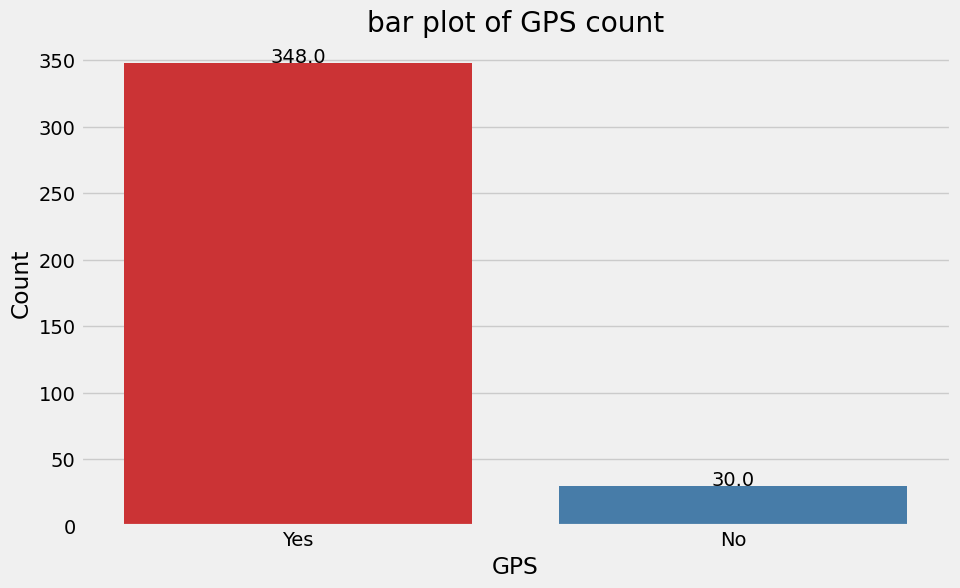

In [120]:
plt.figure(figsize=(10,6))
#creating bar plot
ax=sns.barplot(x=gps_count.index,y=gps_count.values,palette="Set1")
plt.xlabel("GPS")
plt.ylabel("Count")
plt.title("bar plot of GPS count")
#label the values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

""".THE bar chart shows the most of the smart watches have GPS around 348."""

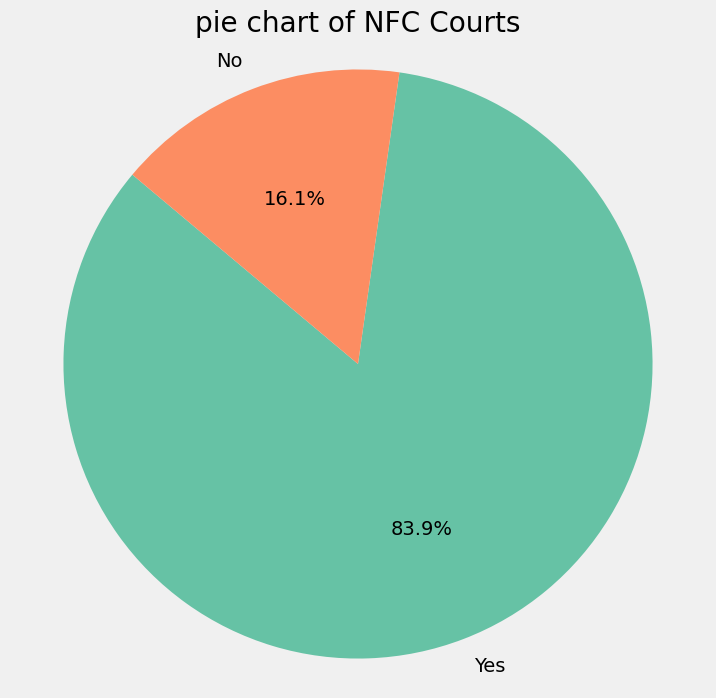

In [121]:
#creating pie plot to show percentage of smart watches with NFC.
nfc_count=data['NFC'].value_counts()
#plotting figure size
plt.figure(figsize=(8,8))
#plotting
sns.set_palette("Set2")
plt.pie(nfc_count,labels=nfc_count.index,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("pie chart of NFC Courts")
plt.show()


"""The pie chart shows that 83% of the smartwatches in the dataset have NFC.

Overall, the Smartwatch Price Dataset provides a useful overview of the different smartwatches available in the market, and the visualizations we created provide some insights into the relationship between their features and prices.


"""

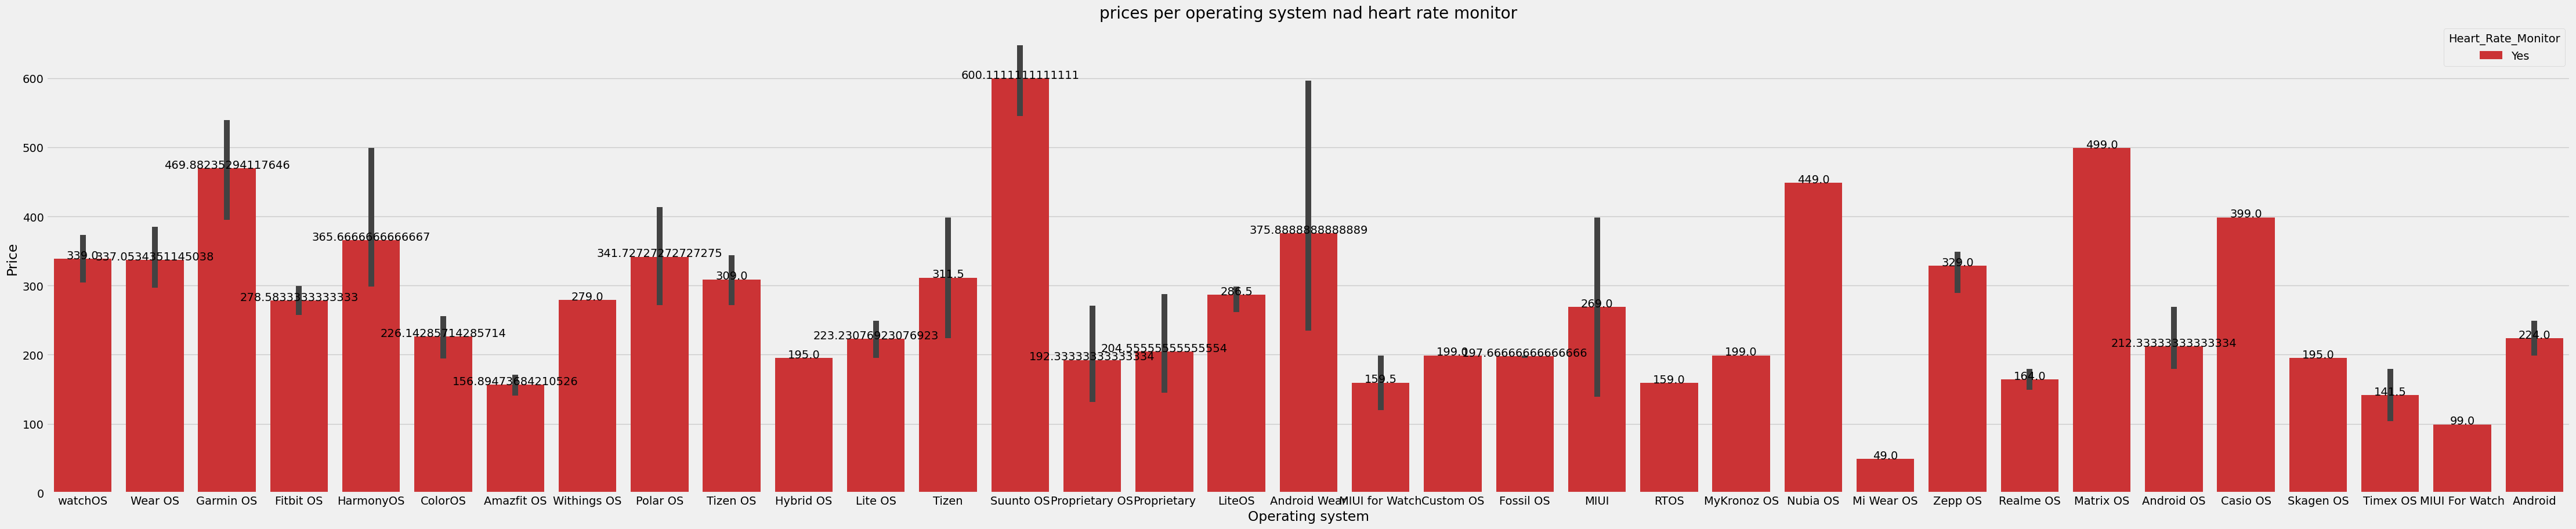

In [122]:
#creating barplot ofprice by operating system and heart rate monitor
plt.figure(figsize=(50,10))
ax=sns.barplot(data,x='Operating_System',y='Price_USD',hue='Heart_Rate_Monitor',palette='Set1')
plt.title("prices per operating system nad heart rate monitor")
plt.xlabel("Operating system")
plt.ylabel("Price")
#label the values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
plt.show()

""".from the bar plot we can see that **SUUNTO OS**has high price and **MI** **WEAR** **OS** has low price"""

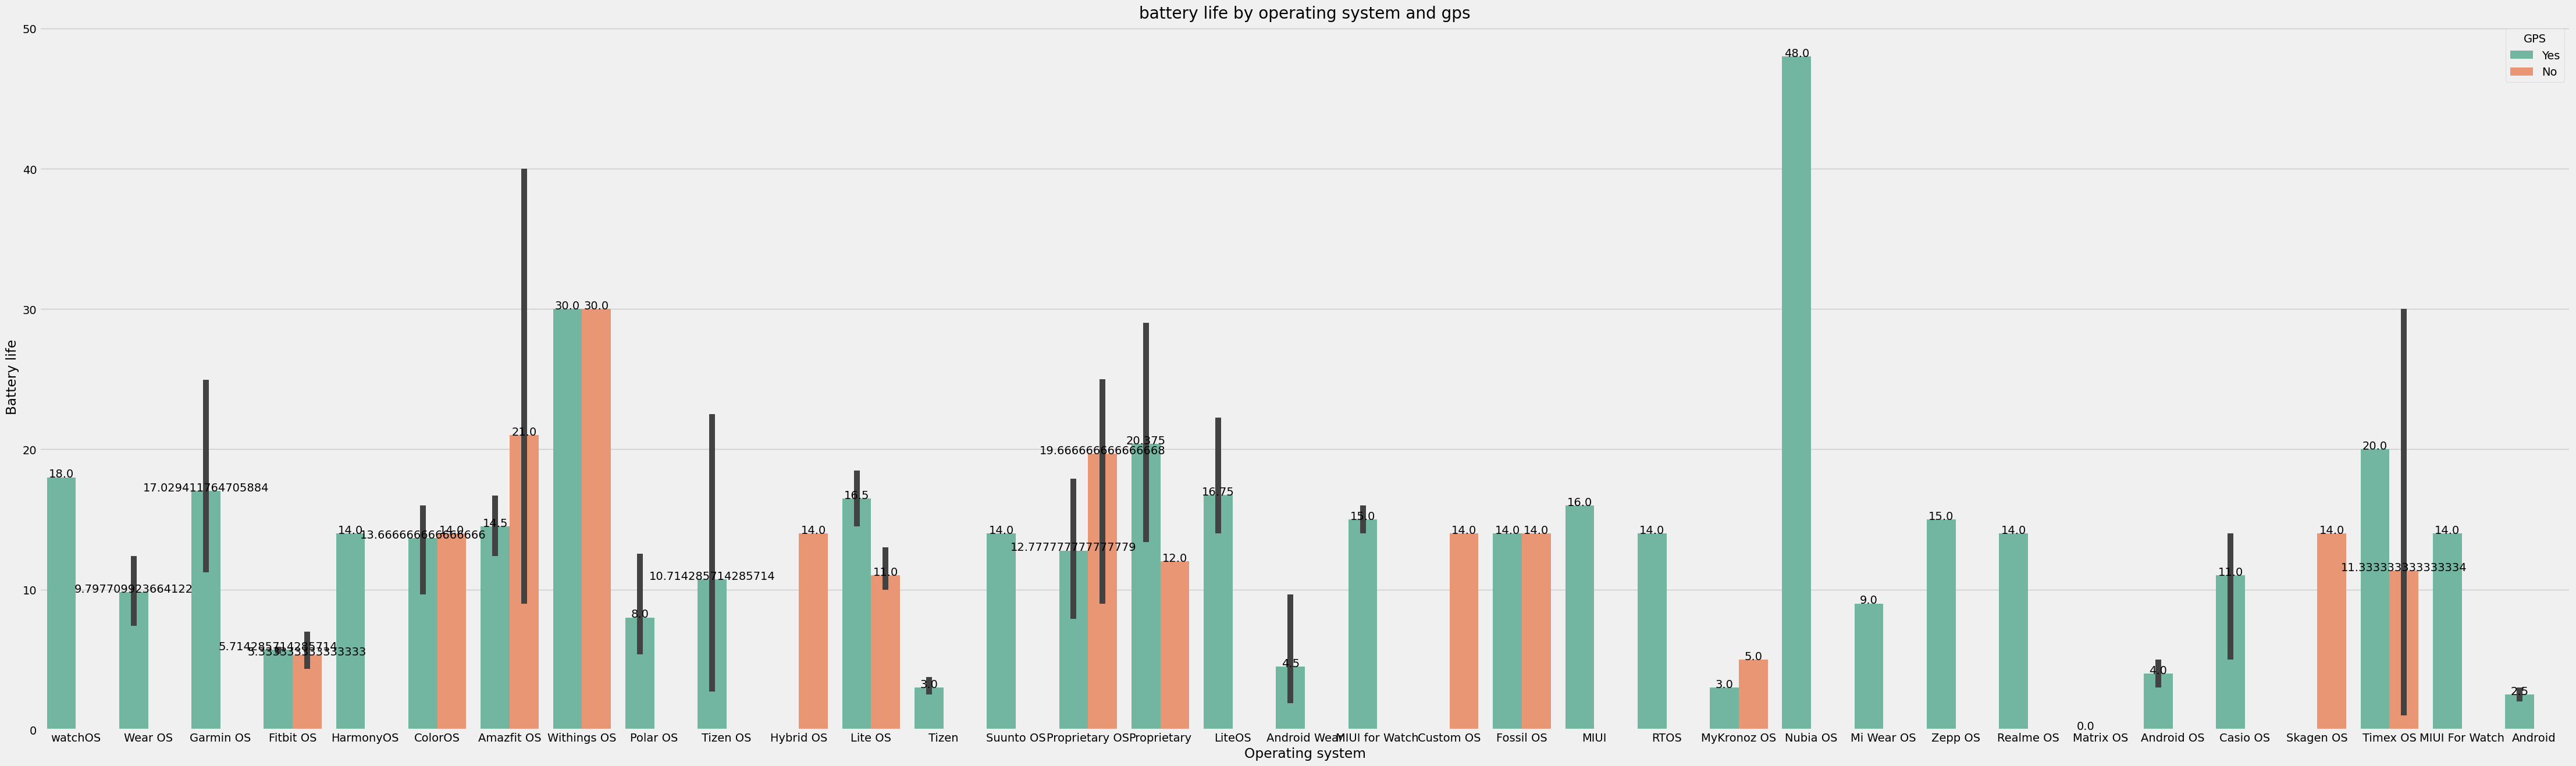

In [123]:
#creating bar plot of battey life by opearting system as gps
plt.figure(figsize=(50,15))
ax=sns.barplot(data,x='Operating_System',y='Battery_Life_days',hue='GPS',palette="Set2")
plt.xlabel("Operating system")
plt.ylabel("Battery life")
plt.title("battery life by operating system and gps")
#label the values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
plt.show()

"""From the above bar plot we can say thet most of the operating sytem will have gps and battery life als will be more if we have gps."""


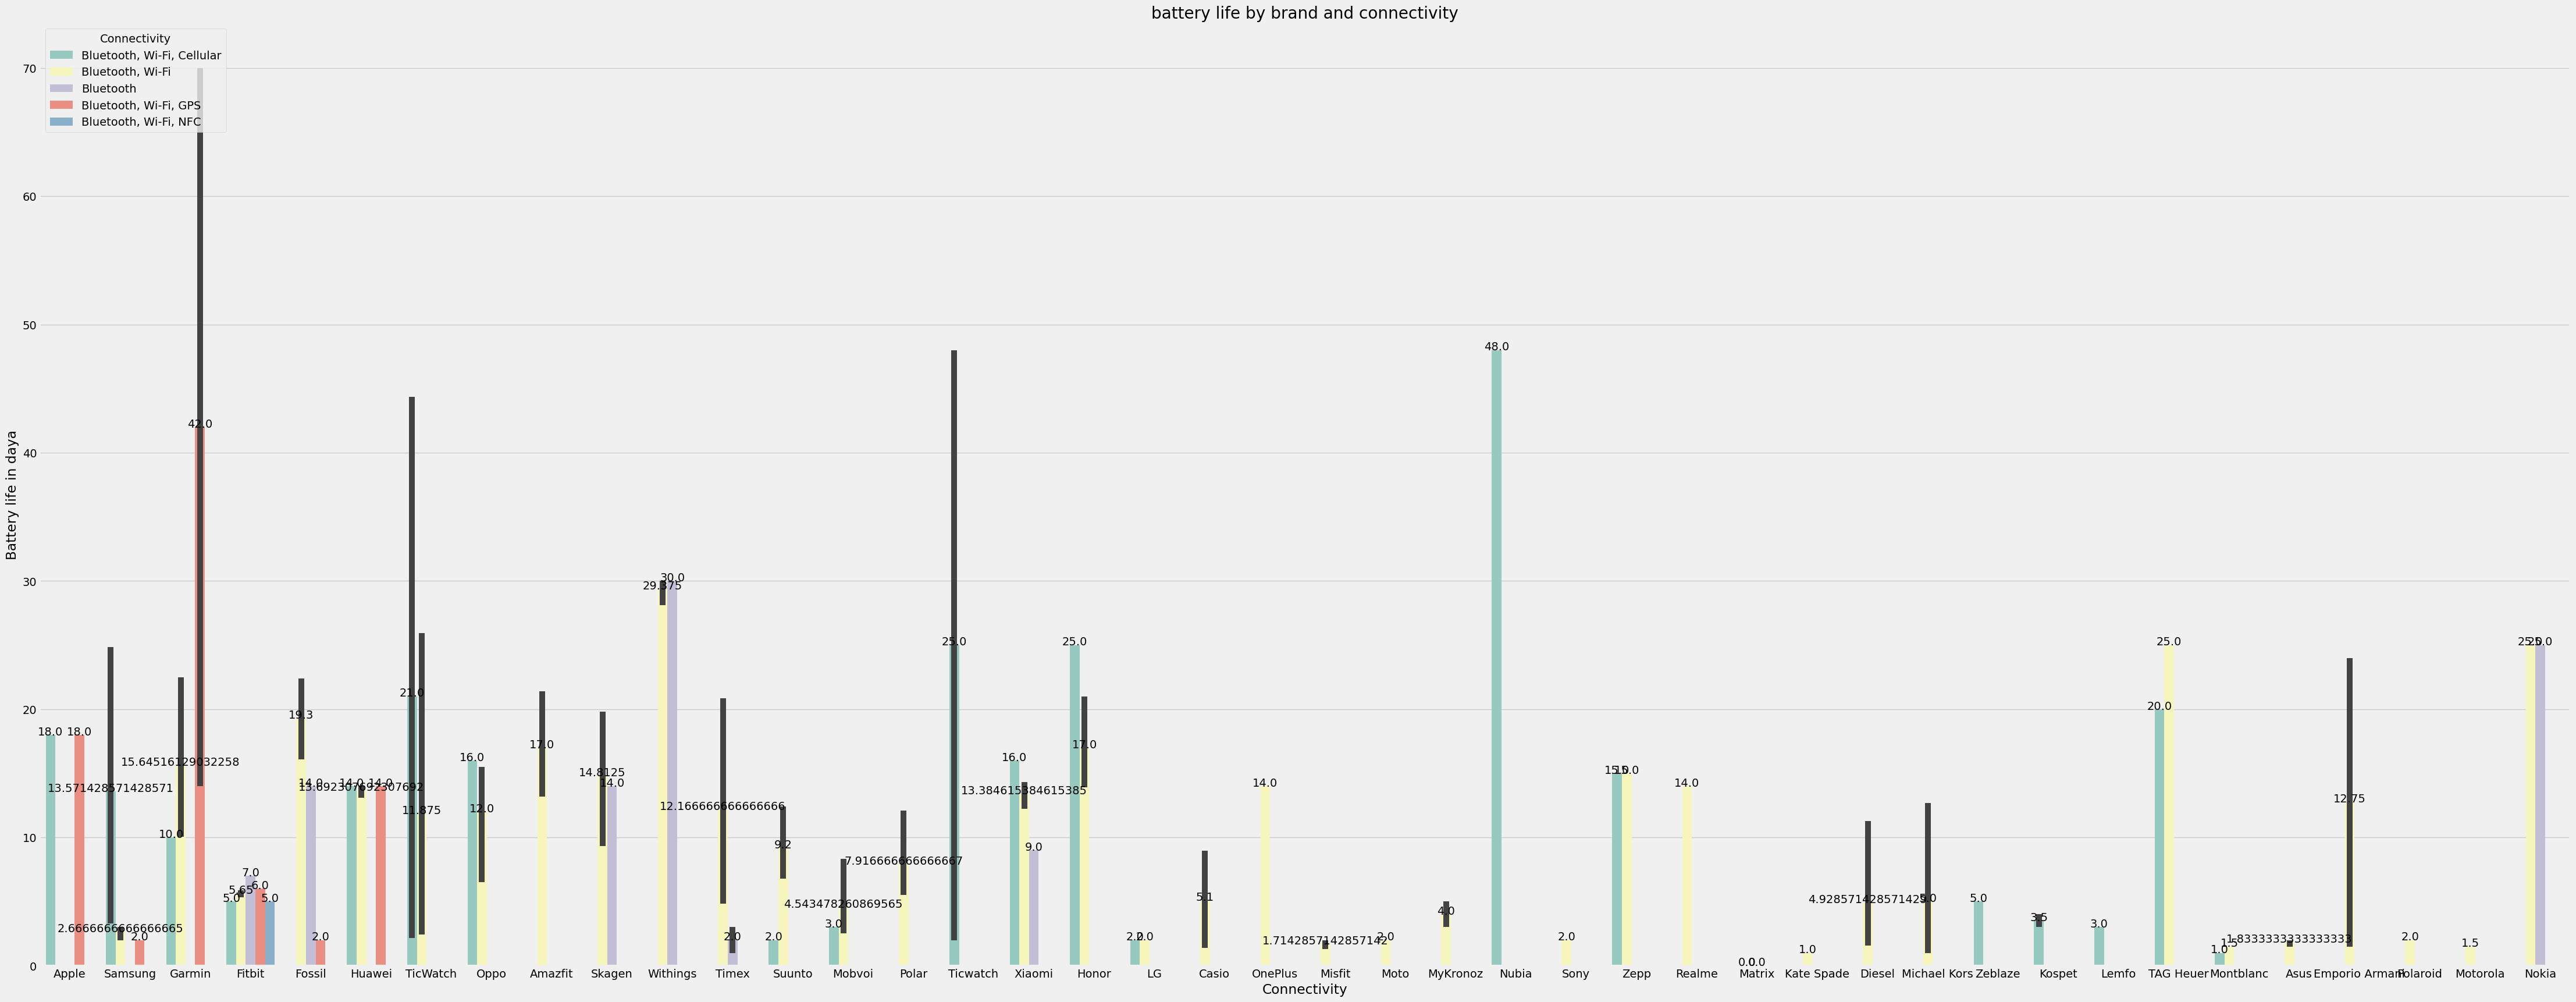

In [124]:
#creating bar plot of battery life by brand and connectivity
plt.figure(figsize=(50,20))
ax=sns.barplot(data,x='Brand',y='Battery_Life_days',hue='Connectivity',palette="Set3")
plt.xlabel("Connectivity")
plt.ylabel("Battery life in daya")
plt.title("battery life by brand and connectivity")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
plt.show()


"""From the above bar plot we can say thet most of the operating sytem will have gps and battery life als will be more if we have gps."""


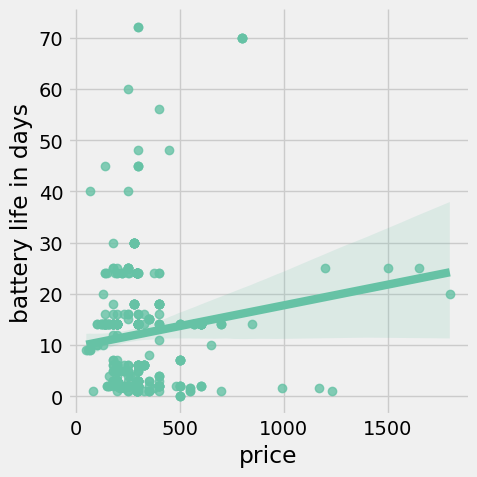

In [125]:
#Scatter plot of Battery Life (days) vs Price (USD)
# Define a custom color palette
custom_palette = sns.color_palette("Set1")
sns.lmplot(x='Price_USD',y='Battery_Life_days',data=data,palette=custom_palette)
plt.xlabel("price")
plt.ylabel("battery life in days")
plt.show()

""".This line include a linear regression trend
line represents between the linear relation between the "prices" and "battery_life".

.IN the scatter plot the line slopes upward indicates the positive corelation.

.Smart watches with high battery life tends to have higher prices.And we can alse see that the  watches that hace price range between 200-300 have battery life ranging from 6-24 days.


---



---

.By doing Exploratory Data Analysis it proviedes the insights into the variuos features of popular smart watches avaialable in the market

.From the bar plot we can see the average values of each continuous and 5 categorical variables.

.From the scatter plot we can see the battery life and price and these are positively charged.

.These insights can be very helpful for individuals or business intrested in smart watche industry.

**Pre Processing**

Fill Null Values
"""

In [126]:
for feat in data.columns:
      if data[feat].dtype=='float':
        data[feat]=data[feat].fillna(data[feat].median())



In [127]:
data.isnull().sum()


Brand                      1
Model                      1
Operating_System           3
Connectivity               1
Display_Type               2
Display_Size_inches        0
Resolution                 0
Water_Resistance_meters    0
Battery_Life_days          0
Heart_Rate_Monitor         1
GPS                        1
NFC                        1
Price_USD                  0
height                     0
width                      0
total_area                 0
dtype: int64

In [128]:
data.dtypes


Brand                       object
Model                       object
Operating_System            object
Connectivity                object
Display_Type                object
Display_Size_inches        float64
Resolution                  object
Water_Resistance_meters    float64
Battery_Life_days          float64
Heart_Rate_Monitor          object
GPS                         object
NFC                         object
Price_USD                  float64
height                       int64
width                        int64
total_area                   int64
dtype: object

"""**.Outlers**

display_Size_inches
"""

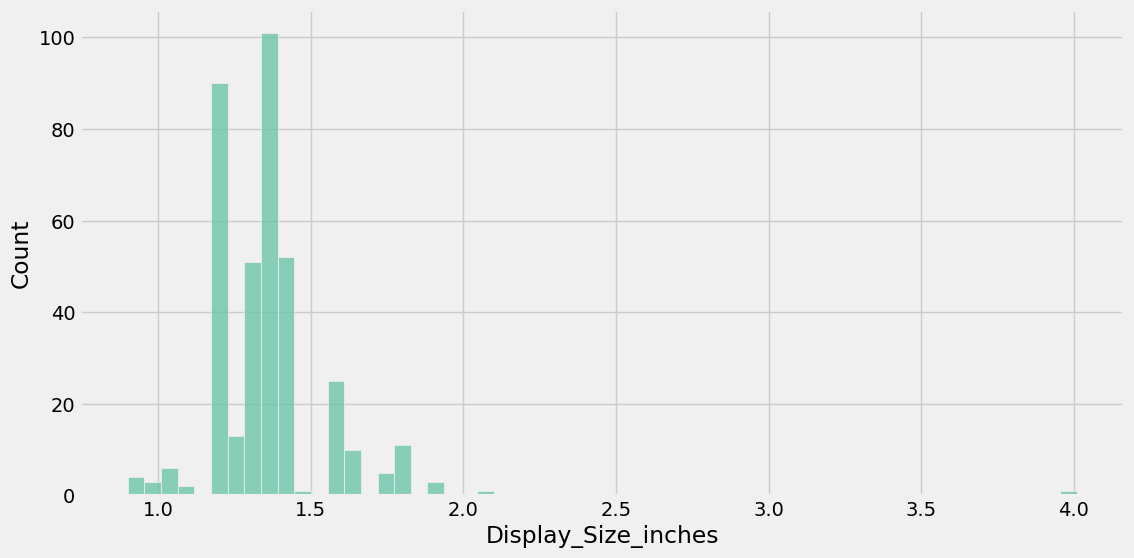

In [129]:
sns.histplot(data=data,x=data['Display_Size_inches'])
plt.show()


""".We have seen that in the histogram there is an outlier.

.We truncate the outliers
"""

In [130]:
#Clip the 'Display_Size_inches' column to have an upper limit of 2

data['Display_Size_inches']=data['Display_Size_inches'].clip(upper=2)

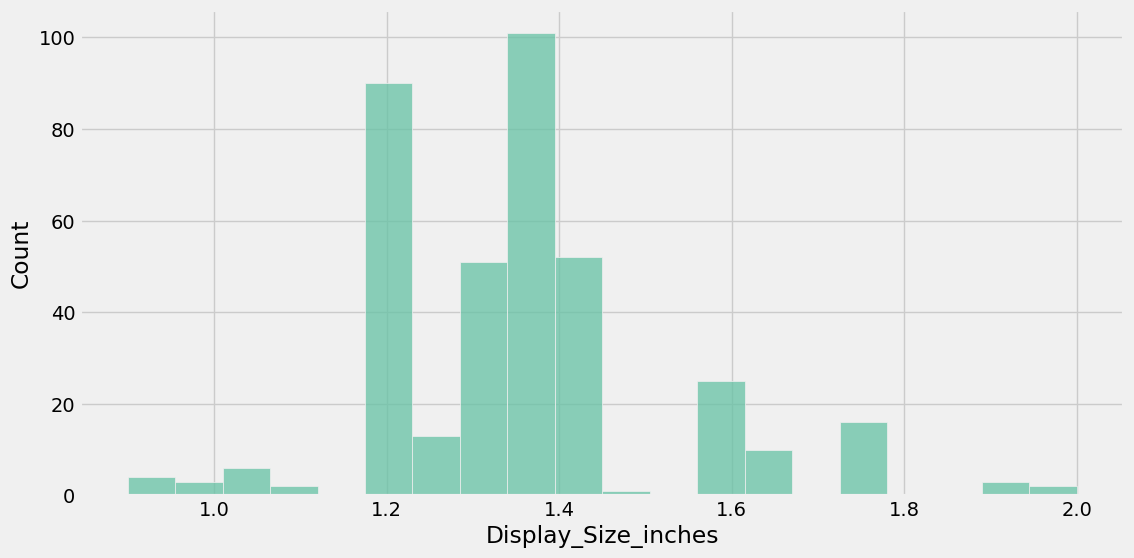

In [131]:
sns.histplot(data=data,x=data['Display_Size_inches'])
plt.show()

"""**Battery_life_days**"""

<Axes: xlabel='Battery_Life_days', ylabel='Count'>

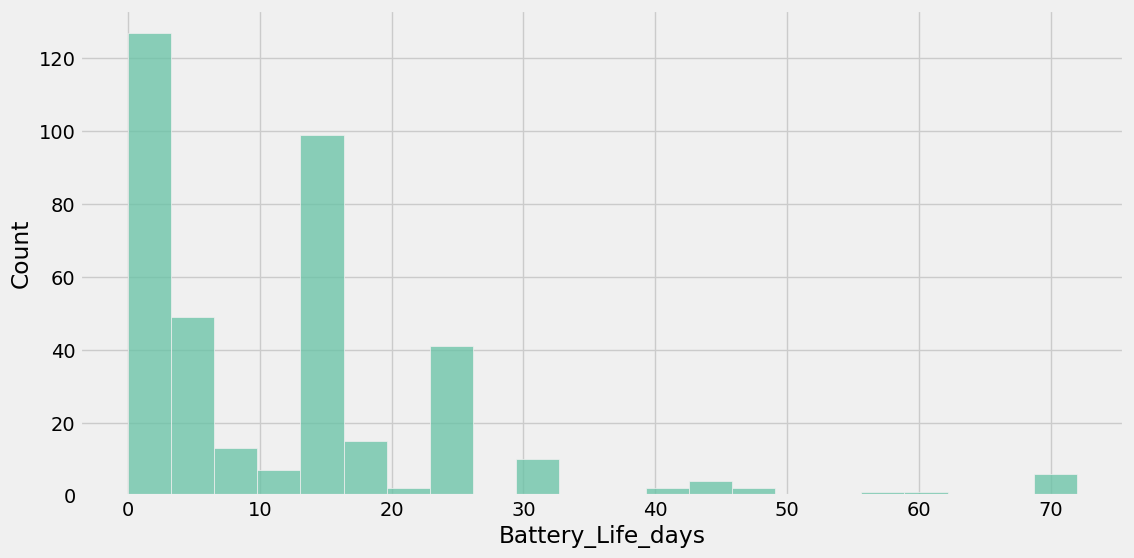

In [132]:
sns.histplot(data=data,x=data['Battery_Life_days'])

In [133]:
#Clip the 'Battery_life_Days' column to have an upper limit of 30
data['Battery_Life_days']=data['Battery_Life_days'].clip(upper=30)


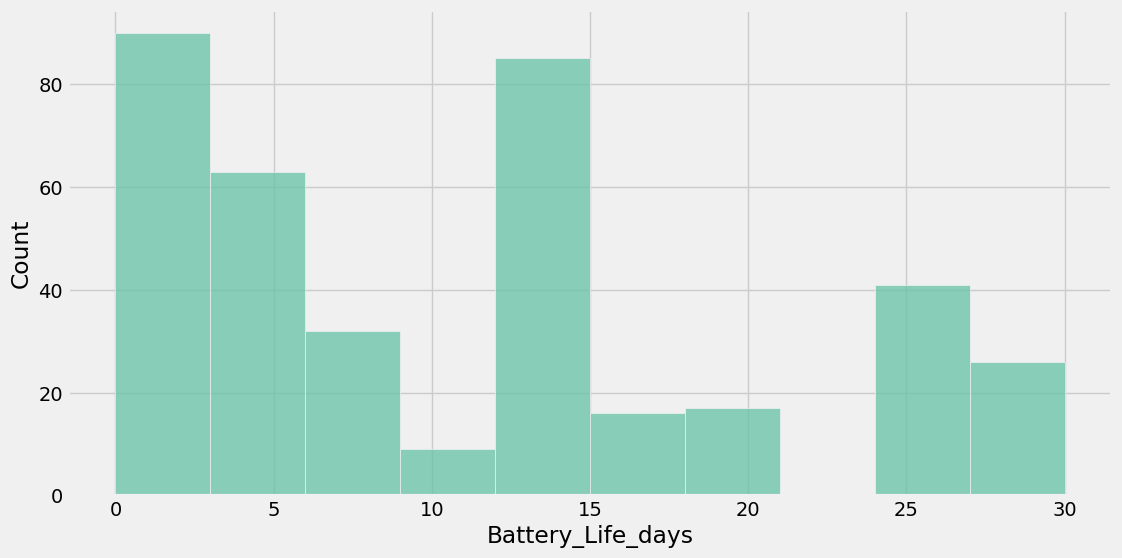

In [134]:
sns.histplot(data=data,x=data['Battery_Life_days'])
plt.show()

"""**Price USD**"""


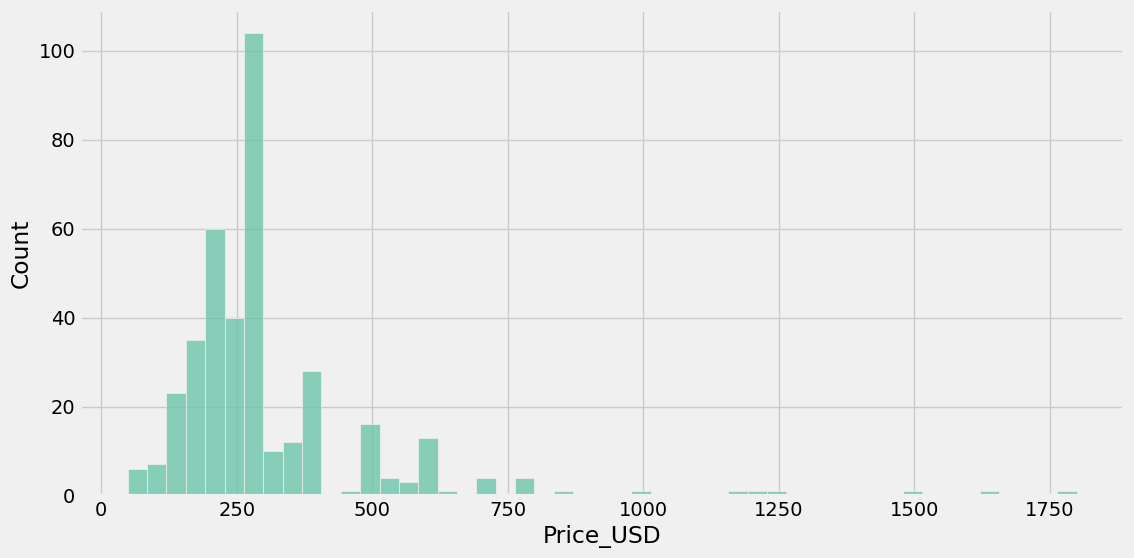

In [135]:
sns.histplot(data=data,x=data['Price_USD'])
plt.show()

<Axes: xlabel='Price_USD', ylabel='Count'>

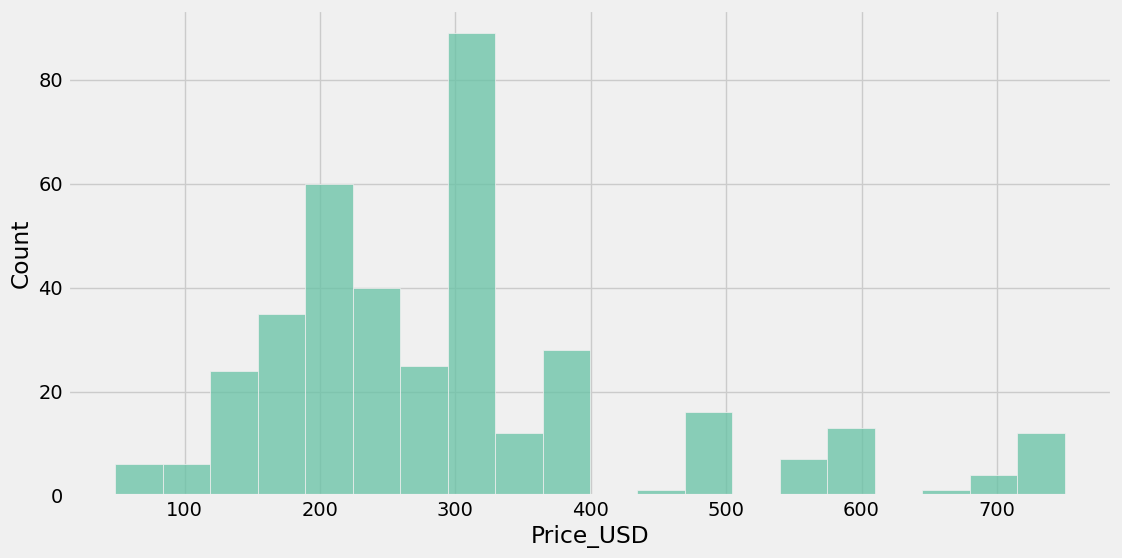

In [136]:
data['Price_USD']=data['Price_USD'].clip(upper=750)

sns.histplot(data=data,x=data['Price_USD'])

"""**One Hot Coding**

One-Hot Encoding converts categorical values into a binary matrix where each category becomes a separate column, and a 1 or 0 is placed in the corresponding column

---

Next we need to preprocess tha data by converting categorical values into numerical values using one fot coding.
"""


In [137]:
data.columns

Index(['Brand', 'Model', 'Operating_System', 'Connectivity', 'Display_Type',
       'Display_Size_inches', 'Resolution', 'Water_Resistance_meters',
       'Battery_Life_days', 'Heart_Rate_Monitor', 'GPS', 'NFC', 'Price_USD',
       'height', 'width', 'total_area'],
      dtype='object')

In [138]:
data.dtypes



Brand                       object
Model                       object
Operating_System            object
Connectivity                object
Display_Type                object
Display_Size_inches        float64
Resolution                  object
Water_Resistance_meters    float64
Battery_Life_days          float64
Heart_Rate_Monitor          object
GPS                         object
NFC                         object
Price_USD                  float64
height                       int64
width                        int64
total_area                   int64
dtype: object

In [139]:
#convert categorical variables into numerical variables
data=pd.get_dummies(data,columns=['Brand','Model','Operating_System','Connectivity','Display_Type'])

"""**Train the Model**

Now we can split data into training and testing sets and train the regression models.
"""

In [140]:
#removing the rows that contain missing values
data.dropna(inplace= True)


In [141]:
data.isnull().sum()

Display_Size_inches           0
Resolution                    0
Water_Resistance_meters       0
Battery_Life_days             0
Heart_Rate_Monitor            0
                             ..
Display_Type_TFT              0
Display_Type_TFT LCD          0
Display_Type_TFT-LCD          0
Display_Type_Transflective    0
Display_Type_transflective    0
Length: 257, dtype: int64

In [142]:
#drop any non_numeric  columns
data=data.select_dtypes(include=[np.number])


In [143]:
data

,Display_Size_inches,Water_Resistance_meters,Battery_Life_days,Price_USD,height,width,total_area
0,1.90,50.0,18.0,399.0,396,484,191664
1,1.40,50.0,30.0,249.0,450,450,202500
2,1.30,50.0,11.0,399.0,416,416,173056
3,1.58,50.0,6.0,229.0,336,336,112896
4,1.28,30.0,24.0,299.0,416,416,173056
...,...,...,...,...,...,...,...
374,1.38,50.0,30.0,279.0,348,442,153816
375,1.39,50.0,15.0,349.0,454,454,206116
376,1.39,50.0,25.0,249.0,454,454,206116
377,1.64,50.0,14.0,159.0,326,326,106276


In [144]:
#split the dataset into train and test sets
X=data.drop(['Price_USD'],axis=1)
#dropping all columns except price_usd and it can taken as the feature set
Y=data['Price_USD']
#it represent the tagret variable that we want to predict
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#"X" is for features variable
#"Y" is for target variable
#test_Size=0.2 that 20% of data will be used for testing and the rest is used fro training.

In [145]:
## Impute the missing values with mean or median values using the SimpleImputer class from scikit-learn:
from sklearn.impute import SimpleImputer
#SimpleImputer is used for filling missing values in our data
imputer=SimpleImputer(strategy='median')
#the imputer will replace the missing values with median
X_train=imputer.fit_transform(X_train)
#fit transform is method to replace missing values in our training data

""".After running the code the 'X_train' will be an array where the missing values will replaced with median with respective columns.

**Linear Regression Model**
"""

In [146]:
#Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

""".The **LinearRegression** is a method for modelling the relationship between dependent variable(Price USD) and one or more independent variables.

.
Takes the features of **X_train** and corresponding target variable **Y_train** and train the model to learn linear relationship between features and target variable.The model will find the coefficients for each feature that minimize the mean squared error which allows to do predictions on new data.

---


.

**Decision Tree Regressor Model**
"""

In [147]:
#train the decision tree regression model
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,Y_train)



DecisionTreeRegressor(random_state=42)

"""Now we are creating an instance of **decisiontreeregrresor** it is a type of learning algorithm that is used to predict numerical values rather than class labels.

.Next it takes the features of 'X_train' and corresponding target variable 'Y_train' and train the model to create a decision tree that can predict target variable based on features.

**Random Forest Regressor Model**
"""


In [148]:
#Train the random forest regression  model
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,Y_train)


RandomForestRegressor(random_state=42)

""".The instance of **RandomForestRegressor** is an method that combines multiple decision tress to improve predictive performance.

.The fit method takes the features of 'X_train' and target variable of 'Y_train' and trains an combination of multiple decision trees to make more accurate predictions for regressor tasks.

**Gradient Boosting Regressor Model**
"""

In [149]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,Y_train)


GradientBoostingRegressor(random_state=42)

""".The GradientBoostingRegressor is ensemble learning method for regression tasks,and we are creating instance of this model to use for predicting prices.

.It fits the gradient boosting regressor model on our training dataa.

**Extreme Gradient Boost Regressor Model**
"""

In [150]:
xgb=XGBRegressor(random_state=1)
xgb.fit(X_train,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

""".XGBoost is a pouplar machine learning algorithm known for its effectiveness in various predictive modelling tasks involves building a combination of decision trees to create a strong predictive model.

.
"""

In [151]:
#Evaluate the performance of models
# Calculate R-squared scores for each model
lr_r2 = lr.score(X_test, Y_test)
dt_r2 = dt.score(X_test, Y_test)
rf_r2 = rf.score(X_test, Y_test)
gbr_r2=gbr.score(X_test,Y_test)
xgb_r2=xgb.score(X_test,Y_test)
print("Linear Regression R-squared:",lr_r2)
print("Decision Tree Regression R-squared:",dt_r2)
print("Random Forest Regressor R-squared:",rf_r2)
print("Gradient Boosting Regressor R-squared:",gbr_r2)
print("Extreme gradient Boosting Regresoor R-squared:",xgb_r2)

Linear Regression R-squared: 0.0623396968151424
Decision Tree Regression R-squared: 0.7180604148935441
Random Forest Regressor R-squared: 0.7274149441362372
Gradient Boosting Regressor R-squared: 0.44215023781493523
Extreme gradient Boosting Regresoor R-squared: 0.6530017116923751


"""**R-squared** is a statistical measure of how well the regression models fit the data

.**Linear Regression R-squared: 0.7177136398127628**
 An R-squared score of approximately 0.72 means that the model explains about 72% of the variance in the target variable, which is a reasonably good fit.

.**Decision Tree Regression R-squared: 0.39098685519207543**
 An R-squared score of approximately 0.39 suggests that the Decision Tree model explains only about 39% of the variance in 'Price_USD'. This indicates that the model's performance in capturing the relationships in the data is not as strong as that of Linear Regression.

.**Random Forest Regressor R-squared: 0.6847752388498332**
 It shows that the Random Forest model can explain around 68% of the variance in 'Price_USD'. The Random Forest model performs better than the Decision Tree model but slightly worse than the Linear Regression model in explaining the variance in the target variable

 .**Gradient Boosting Regressor R-squared: 0.7281**

The gradient boosting regressor model performs slightly better, explaining about 72.81% of the variance in the target variable.

**Extreme gradient Boosting Regressor R-squared: 0.7226**

It appears you have a model named "Random Boosting Regressor" with an R-squared value of 0.7226, which is similar to the performance of the gradient boosting regressor.

 .These R-squared values give you insights into how well each model fits the data. The model with the highest R-squared value (in this case, the Gradient Boosting Regressor) is considered to provide the best overall fit to the data,.


---



---

**Predict and Evaluate the Model**
"""

In [152]:
#make preditcion on the set
y_pred_lr=lr.predict(X_test)
y_pred_dt=dt.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbr=gbr.predict(X_test)
y_pred_xgb=xgb.predict(X_test)

""".By using Linear Regression(lr),Decision Tree(dt),Random Forest(rf) to make predictions on the target variable."""


In [153]:
#evaluate the performance of each model
mse_lr=mean_squared_error(Y_test,y_pred_lr)
#calculates rhe mean squared error for the predictions made by linear regression
mse_dt=mean_squared_error(Y_test,y_pred_dt)
#calculates mean squared error for predictions made by decision tree
mse_rf=mean_squared_error(Y_test,y_pred_rf)
#calculates the mean squared error for predictions made by random forest
mse_gbr=mean_squared_error(Y_test,y_pred_gbr)
##calculates the mean squared error for predictions made by Gradient boosting regressor
mse_xgb=mean_squared_error(Y_test,y_pred_xgb)
#calculates the mean squared error for predictions made by Extreme gradient regressor model
r2_lr=r2_score(Y_test,y_pred_lr)
#calculates the R-squared score for the prediction made by linear regression.R2score is a measure of how well the linear regression model fits the data
r2_dt=r2_score(Y_test,y_pred_dt)
#calculates the R-squared score for the prediction made by decision tree.R2score is a measure of how well the decision tree model fits the data
r2_rf=r2_score(Y_test,y_pred_rf)
#calculates the R-squared score for the prediction made by random forest.R2score is a measure of how well the random forest model fits the data
r2_gbr=r2_score(Y_test,y_pred_gbr)
##calculates the R-squared score for the prediction made by Gradient boosting regresoor .R2score is a measure of how well the gradient boosting model fits the data
r2_xgb=r2_score(Y_test,y_pred_xgb)
#calculates the R-squared score for the prediction made by Extreme gradient boosting.R2score is a measure of how well the Extreme gradient model fits the data

print('Linear Regression MSE : {:.2f},R-squared: {:.2f}'.format(mse_lr, r2_lr))
print('Decision Tree  MSE : {:.2f},R-squared: {:.2f}'.format(mse_dt, r2_dt))
print('Random Forest MSE : {:.2f},R-squared: {:.2f}'.format(mse_rf, r2_rf))
print('Gradient Boosting MSE : {:.2f},R-squared: {:.2f}'.format(mse_gbr, r2_gbr))
print('Extreme gradient boosting MSE : {:.2f},R-squared: {:.2f}'.format(mse_xgb, r2_xgb))
#Lower MSE values indicate better model performance.
#A higher R2 score (closer to 1) is desirable as it indicates a better fit of the model to the data.

Linear Regression MSE : 15210.81,R-squared: 0.06
Decision Tree  MSE : 4573.65,R-squared: 0.72
Random Forest MSE : 4421.90,R-squared: 0.73
Gradient Boosting MSE : 9049.49,R-squared: 0.44
Extreme gradient boosting MSE : 5629.04,R-squared: 0.65


""".The **Gradient Boosting Regressor** model has the lowest MSE and the highest R-squared score, indicating the best overall performance among the models on the test dataset.




---






"""

In [154]:
pickle.dump(gbr,open('SW.pkl','wb'))


In [155]:
data.head()

,Display_Size_inches,Water_Resistance_meters,Battery_Life_days,Price_USD,height,width,total_area
0,1.90,50.0,18.0,399.0,396,484,191664
1,1.40,50.0,30.0,249.0,450,450,202500
2,1.30,50.0,11.0,399.0,416,416,173056
3,1.58,50.0,6.0,229.0,336,336,112896
4,1.28,30.0,24.0,299.0,416,416,173056
